<a href="https://colab.research.google.com/github/oreoluwaodeyinka/data_analytics_25/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oreoluwa Odeyinka
Python for Data Analytics Winter 2025

# Project 2

*   The goal of this project is to analyze diabetes data
*   pick any group in this dataset as an initial comparison point
* pick a feature/measure/indicator
* compare above group to any other (different) group - you only
need to do one additional group comparison (but you’re welcome to
do more comparisons if you feel compelled to do so)
* the analysis should include some descriptive statistics
* the analysis should include one cleaning task (or more)
* the analysis should include one visualization (or more)
* the analysis should include a brief conclusion statement (not more
than two or three sentences)




In [86]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

sns.set(style='whitegrid')

In [87]:
#Reading the CSV file
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [88]:
# Checking to see data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Cleaning The Data

In [89]:
#Clean column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'a1cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesmed', 'readmitted'],
      dtype='object')

Upon examining the data, we see that there are a lot of columns and it is not necessary to work with all of them for this project so I'm going to be dropping most of the columns that have to do with medications that the patients are prescribed and any that I don't plan on examining.

In [90]:
# dropping most of the medication columns
modified_db = df.drop(['repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'max_glu_serum', 'payer_code', 'a1cresult'], axis=1)

modified_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  medical_specialty         101766 non-null  object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 
 14  numb

In [91]:
#using this as a reference for column names
modified_db.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'diabetesmed', 'readmitted'],
      dtype='object')

##Remember that we have changed the dataframe to modified_db

In [92]:
# I know that weight is a weird one so taking a glimpse in the data
# Inspect unique values in weight
modified_db['weight'].unique()[:20]


array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [93]:
#inspecting the age column as well

modified_db['age'].unique()[:20]

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [94]:
#inspecting the diag_1 result column
modified_db['diag_1'].unique()[:20]

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189'], dtype=object)

In [95]:
modified_db['metformin'].unique()[:20]

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [96]:

#Changing the data types of the numerical columns to numerical

numerical_cols = ['encounter_id', 'patient_nbr', 'admission_type_id',
                  'discharge_disposition_id', 'admission_source_id',
                  'time_in_hospital', 'num_lab_procedures', 'num_procedures',
                  'num_medications', 'number_outpatient', 'number_emergency',
                  'number_inpatient', 'number_diagnoses']

for col in numerical_cols:
    modified_db[col] = pd.to_numeric(modified_db[col], errors='coerce')


In [97]:
modified_db.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'diabetesmed', 'readmitted'],
      dtype='object')

In [98]:
#Changing the data types of the rest of the columns to categorical
#age, race, gender needs to be a category because it's grouped

categorical_cols = ['race', 'gender', 'age', 'weight',
                    'admission_type_id', 'medical_specialty',
                    'diag_1', 'diag_2', 'diag_3', 'metformin', 'diabetesmed',
                    'readmitted']

for col in categorical_cols:
    modified_db[col] = modified_db[col].astype('category')



In [99]:
#checking the data types have changed

modified_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              101766 non-null  int64   
 1   patient_nbr               101766 non-null  int64   
 2   race                      101766 non-null  category
 3   gender                    101766 non-null  category
 4   age                       101766 non-null  category
 5   weight                    101766 non-null  category
 6   admission_type_id         101766 non-null  category
 7   discharge_disposition_id  101766 non-null  int64   
 8   admission_source_id       101766 non-null  int64   
 9   time_in_hospital          101766 non-null  int64   
 10  medical_specialty         101766 non-null  category
 11  num_lab_procedures        101766 non-null  int64   
 12  num_procedures            101766 non-null  int64   
 13  num_medications           101

In [100]:
#Checking for null values
print('Missing values per column:')
print(modified_db.isna().sum())

Missing values per column:
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
diabetesmed                 0
readmitted                  0
dtype: int64


## Picking a Group in the Dataset as an Initial Comparison Point

I am choosing the Female gender as the group to use as the initial comparison point


In [101]:
#inspecting the gender column to see if this is the group I want to pick

modified_db['gender'].unique()[:20]

['Female', 'Male', 'Unknown/Invalid']
Categories (3, object): ['Female', 'Male', 'Unknown/Invalid']

In [102]:
#Make a new datframe that is just information for the female gender
female_df = modified_db[modified_db['gender'] == 'Female']
female_df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,diabetesmed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,59,0,18,0,0,0,276,250.01,255,9,No,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,11,5,13,2,0,1,648,250,V27,6,No,Yes,NO
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,68,2,28,0,0,0,398,427,38,8,No,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,InternalMedicine,33,3,18,0,0,0,434,198,486,8,No,Yes,NO


Including descriptive statistics about the female gender group.

In [103]:
print('Statistics about the time spent in hospital for the female gender')
print(female_df['time_in_hospital'].describe())

Statistics about the time spent in hospital for the female gender
count   54,708.00
mean         4.48
std          2.98
min          1.00
25%          2.00
50%          4.00
75%          6.00
max         14.00
Name: time_in_hospital, dtype: float64


In [104]:
print('Statistics about the number of procedures that the female gender had')
print(female_df['num_procedures'].describe())

Statistics about the number of procedures that the female gender had
count   54,708.00
mean         1.24
std          1.62
min          0.00
25%          0.00
50%          1.00
75%          2.00
max          6.00
Name: num_procedures, dtype: float64


## Picking a Different Group in the Dataset as Comparison.

I am choosing the Unknown/Invalid gender as the group to use as the comparison.

In [114]:
#Make a new datframe that is just information for the female gender
unknown_df = modified_db[modified_db['gender'] == 'Unknown/Invalid']
unknown_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,diabetesmed,readmitted
30506,98634858,100695042,Other,Unknown/Invalid,[70-80),?,3,1,1,1,Cardiology,5,5,22,0,0,0,414,411,401,4,No,Yes,NO
75551,226864668,60524946,?,Unknown/Invalid,[60-70),?,1,1,7,1,?,38,1,6,0,0,0,808,873,E813,5,No,No,NO
82573,257364294,78119847,?,Unknown/Invalid,[70-80),?,1,22,7,8,?,59,2,21,0,0,0,850,805,808,9,Steady,Yes,NO


Including descriptive statistics about the unknown/invalid gender group.

In [107]:
print('Statistics about the time spent in hospital for the unknown/invalid gender')
print(unknown_df['time_in_hospital'].describe())

Statistics about the time spent in hospital for the unknown/invalid gender
count   3.00
mean    3.33
std     4.04
min     1.00
25%     1.00
50%     1.00
75%     4.50
max     8.00
Name: time_in_hospital, dtype: float64


In [108]:
print('Statistics about the number of procedures that the unknown/invalid gender had')
print(unknown_df['num_procedures'].describe())

Statistics about the number of procedures that the unknown/invalid gender had
count   3.00
mean    2.67
std     2.08
min     1.00
25%     1.50
50%     2.00
75%     3.50
max     5.00
Name: num_procedures, dtype: float64


From these comparisons we can infer that on average the female gender group spent more time in the hospital but had less procedures than the unknown/invalid gender group.  

## Visualizations Comparing the Female Gender Group to the Unknown/Invalid Data Group


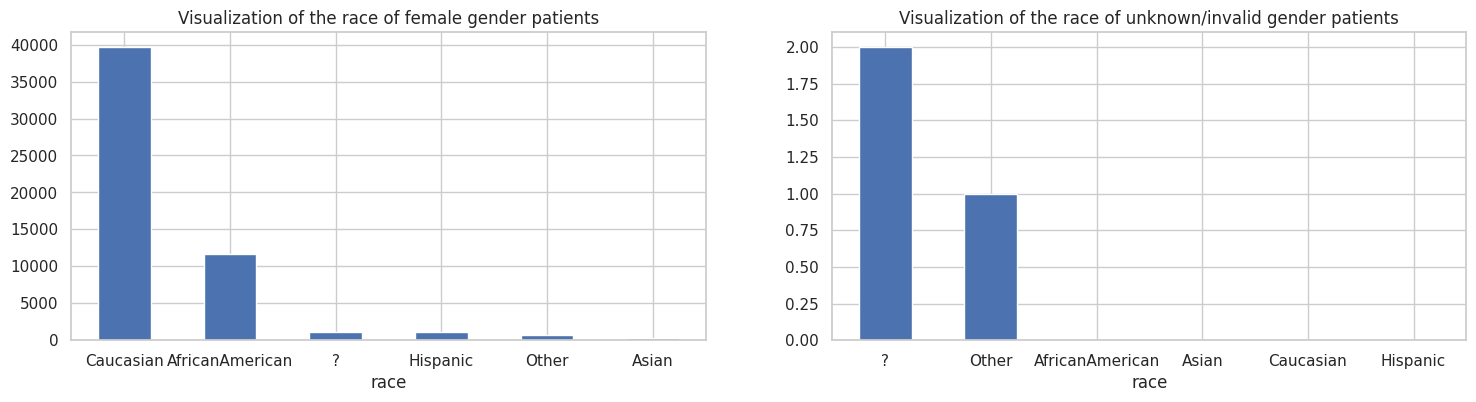

In [132]:
#Visualizing the female and unknown/invalid gender groups broken down by race.

# Calculating the frequency of each category
female_category_counts = female_df['race'].value_counts()
unkown_category_counts = unknown_df['race'].value_counts()


# Creating a bar chart

fig, axes = plt.subplots(1, 2, figsize=(18, 4))

female_category_counts.plot(kind='bar', rot=0, ax=axes[0])
axes[0].set_title('Visualization of the race of female gender patients')

unkown_category_counts.plot(kind='bar', rot=0, ax=axes[1])
axes[1].set_title('Visualization of the race of unknown/invalid gender patients')

plt.show()

## Trying out grouping to make more interesting visualizations

In [137]:
grouped_df = female_df.groupby('age', observed=False)

# To see the number of items in each group and what the type is:
print(grouped_df.size())
print(type(grouped_df))

age
[0-10)         83
[10-20)       402
[20-30)      1114
[30-40)      2162
[40-50)      4811
[50-60)      8572
[60-70)     11061
[70-80)     13985
[80-90)     10515
[90-100)     2003
dtype: int64
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


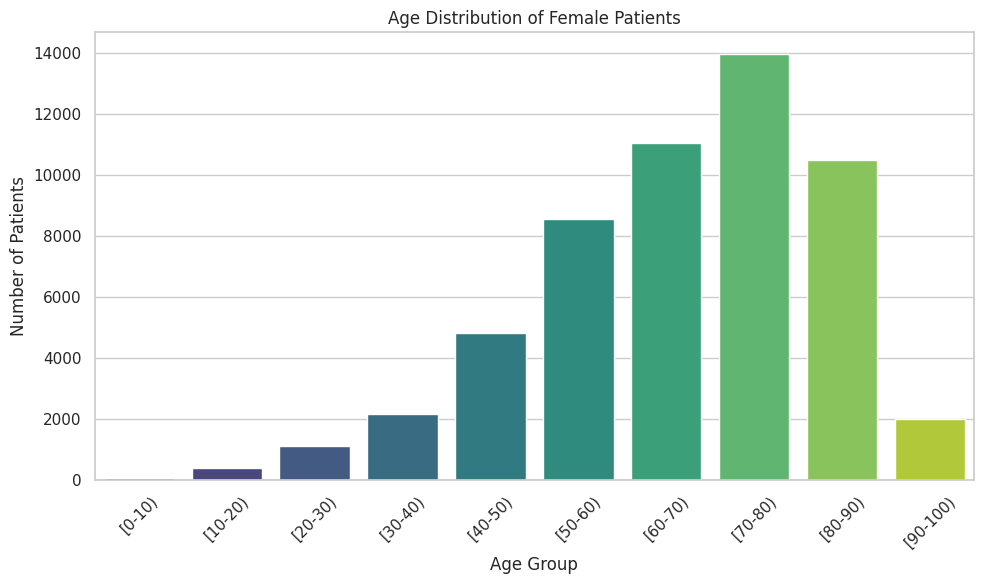

In [133]:
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.size().index, y=grouped_df.size().values, hue=grouped_df.size().index, palette='viridis', legend=False)
plt.title('Age Distribution of Female Patients')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

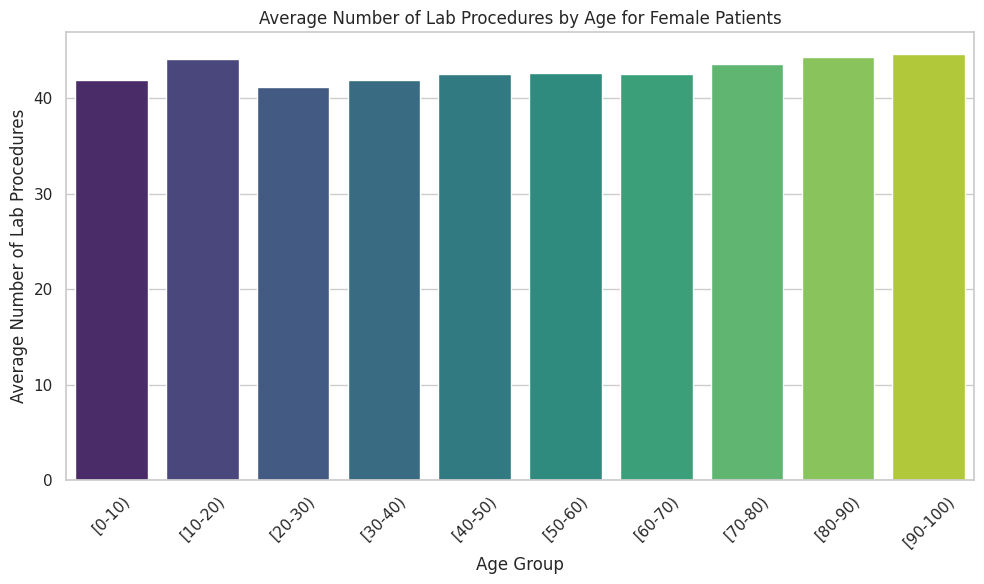

In [135]:
#Average number of lab procedures by age for female patients

plt.figure(figsize=(10, 6))
mean_lab_procedures = grouped_df['num_lab_procedures'].mean()
sns.barplot(
    x = mean_lab_procedures.index,
    y = mean_lab_procedures.values,
    hue=mean_lab_procedures.index, palette='viridis', legend=False)
plt.title('Average Number of Lab Procedures by Age for Female Patients')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Lab Procedures')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [136]:
#Testing to make sure the visualization is correct
print(grouped_df['num_lab_procedures'].mean())

age
[0-10)     41.87
[10-20)    44.04
[20-30)    41.14
[30-40)    41.91
[40-50)    42.49
[50-60)    42.58
[60-70)    42.50
[70-80)    43.55
[80-90)    44.24
[90-100)   44.64
Name: num_lab_procedures, dtype: float64


# Conclusion Statement

This data was a bit overwhelming in the beginning so I decided to drop some columns and leave those that seemed most interesting to analyze later. In conclusion there wasn't that much data for unkonwn/invalid gender so in the future I would maybe choose a different comparison group but the female gender had lots of interesting insights. Most females gender patients who went to the hospotal were Caucasian followed by African American and the age group amongst the female gender who had the most admissions were betwen 70 and 80 years old.